In [5]:
# load Wine Dataset
from sklearn.datasets import load_wine
from sklearn.neighbors import  KNeighborsClassifier
import numpy as np
winedata = load_wine()
feature_names = winedata.feature_names


In [6]:
# Select features using LASSO
from sklearn.linear_model import LassoCV
data_x = winedata.data
data_y = winedata.target
Lasso_algo = LassoCV().fit(data_x, data_y)
shrinking = np.abs(Lasso_algo.coef_)
features_index = (-shrinking).argsort()[:2]
# Data with two features
data_x = data_x [:,features_index ]

In [7]:
from sklearn.cluster import AgglomerativeClustering
Hie_clus = AgglomerativeClustering(n_clusters=3, distance_threshold =None, linkage='ward', affinity='euclidean').fit(data_x)


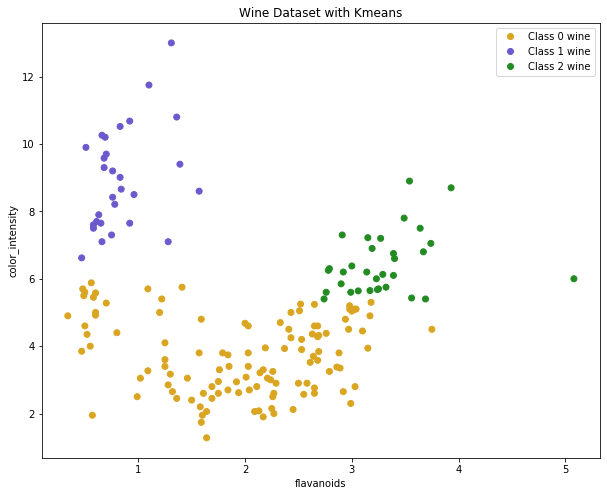

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

feature_1 = data_x[:,0] # flavanoids
feature_2 = data_x[:,1] # color_intensity
label_wine_hie = Hie_clus.labels_
plt.figure(figsize=(10,8))
classes = ['Class 0 wine', 'Class 1 wine', 'Class 2 wine']
colors = [ 'goldenrod', 'slateblue','forestgreen']
 
scatter = plt.scatter(feature_1, feature_2, c= label_wine_hie  , cmap = mcolors.ListedColormap(colors))

plt.xlabel("flavanoids")
plt.ylabel("color_intensity")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Wine Dataset with Kmeans')
plt.savefig('Wine_data_kmeans.png', dpi=72, bbox_inches='tight')
plt.show()